<a href="https://colab.research.google.com/github/Venusvasan/My-journey/blob/main/Notebooks/Netflix_Load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read Csv
df = pd.read_csv('/content/drive/MyDrive/Datasets/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#basic Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [ ]:
print(df['rating'].value_counts())

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

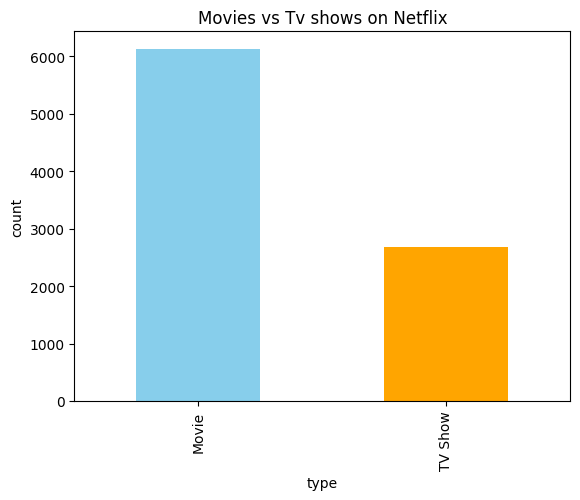

In [ ]:
df['type'].value_counts().plot(kind ='bar',color =['skyblue','Orange'])
plt.title("Movies vs Tv shows on Netflix")
plt.xlabel('type')
plt.ylabel('count')
plt.show()

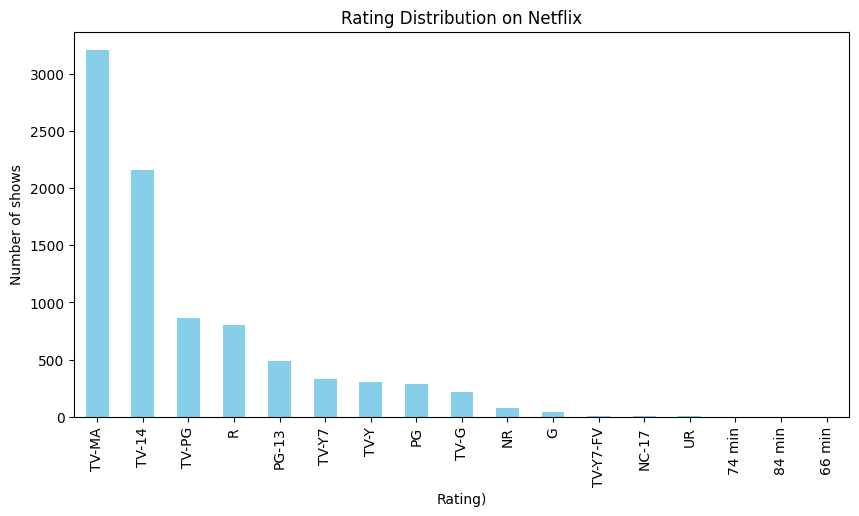

In [ ]:
#Rating Distribution
df['rating'].value_counts().plot(kind ='bar',figsize=(10,5),color =['skyblue'])
plt.title("Rating Distribution on Netflix")
plt.xlabel('Rating)')
plt.ylabel('Number of shows')
plt.show()

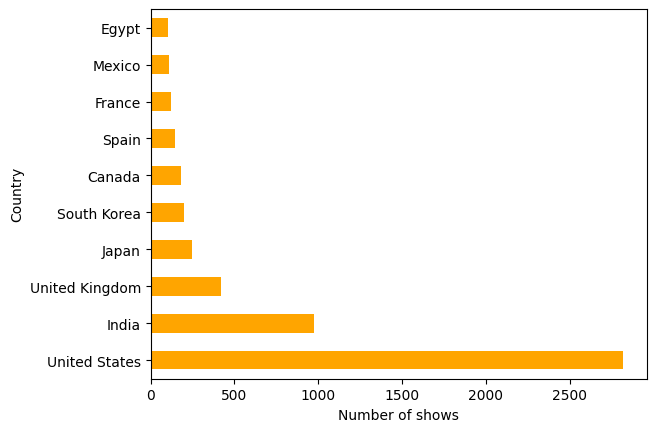

In [ ]:
#top ten countries
df['country'].value_counts().head(10).plot(kind='barh',color='orange')
plt.xlabel('Number of shows')
plt.ylabel('Country')
plt.show()

In [ ]:
#Convert date added column into proper date time
df['date_added'] = pd.to_datetime(df['date_added'],errors = 'coerce')

#Add a column , year_added
df['year_added'] = df['date_added'].dt.year

# fill missing values in rating column as unknown
df['rating']= df['rating'].fillna('Unknown')

#drop rows where type is missing
df = df.dropna(subset=['type'])

df[['title','country','year_added','rating']].head(10)

,title,country,year_added,rating
0,Dick Johnson Is Dead,United States,2021.0,PG-13
1,Blood & Water,South Africa,2021.0,TV-MA
2,Ganglands,NaN,2021.0,TV-MA
3,Jailbirds New Orleans,NaN,2021.0,TV-MA
4,Kota Factory,India,2021.0,TV-MA
5,Midnight Mass,NaN,2021.0,TV-MA
6,My Little Pony: A New Generation,NaN,2021.0,PG
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021.0,TV-MA
8,The Great British Baking Show,United Kingdom,2021.0,TV-14
9,The Starling,United States,2021.0,PG-13


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
# Features: description text, Target: type (Movie/TV Show)
X = df['description'].fillna("")
Y = df['type']

In [ ]:
# Convert text into numbers (bag of words)
vectorizer = CountVectorizer(stop_words = 'english')
X_vec = vectorizer.fit_transform(X)

#split data
X_train,X_test, Y_train, Y_test = train_test_split(X_vec,Y,test_size = 0.2,random_state=42)

#train Logistic Regression
model = LogisticRegression(max_iter = 200)
model.fit(X_train,Y_train)

# test_accuracy
print("Accuracy:",model.score(X_test,Y_test))


Accuracy: 0.7485811577752554


In [1]:
X = df['description'].fillna("")

NameError: name 'df' is not defined